In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from copy import deepcopy
import json
import subprocess
from time import time
# import cProfile

In [2]:
global nprocs
nprocs= 4
MPI_FUNC_INDEX=["MPI_Init","MPI_Finalize","MPI_Send","MPI_Recv","MPI_Irecv","MPI_Abort","MPI_Accumulate","MPI_Add_error_class","MPI_Add_error_code","MPI_Add_error_string","MPI_Address","MPI_Aint_add","MPI_Aint_diff","MPI_Allgather","MPI_Allgatherv","MPI_Alloc_mem","MPI_Allreduce","MPI_Alltoall","MPI_Alltoallv","MPI_Alltoallw","MPI_Attr_delete","MPI_Attr_get","MPI_Attr_put","MPI_Barrier","MPI_Bcast","MPI_Bsend","MPI_Bsend_init","MPI_Buffer_attach","MPI_Buffer_detach","MPI_Cancel","MPI_Cart_coords","MPI_Cart_create","MPI_Cart_get","MPI_Cart_map","MPI_Cart_rank","MPI_Cart_shift","MPI_Cart_sub","MPI_Cartdim_get","MPI_Close_port","MPI_Comm_accept","MPI_Comm_call_errhandler","MPI_Comm_compare","MPI_Comm_connect","MPI_Comm_create","MPI_Comm_create_errhandler","MPI_Comm_create_group","MPI_Comm_create_keyval","MPI_Comm_delete_attr","MPI_Comm_disconnect","MPI_Comm_dup","MPI_Comm_dup_with_info","MPI_Comm_free","MPI_Comm_free_keyval","MPI_Comm_get_attr","MPI_Comm_get_errhandler","MPI_Comm_get_info","MPI_Comm_get_name","MPI_Comm_get_parent","MPI_Comm_group","MPI_Comm_idup","MPI_Comm_join","MPI_Comm_rank","MPI_Comm_remote_group","MPI_Comm_remote_size","MPI_Comm_set_attr","MPI_Comm_set_errhandler","MPI_Comm_set_info","MPI_Comm_set_name","MPI_Comm_size","MPI_Comm_split","MPI_Comm_split_type","MPI_Comm_test_inter","MPI_Compare_and_swap","MPI_Dims_create","MPI_Dist_graph_create","MPI_Dist_graph_create_adjacent","MPI_Dist_graph_neighbors","MPI_Dist_graph_neighbors_count","MPI_Errhandler_create","MPI_Errhandler_free","MPI_Errhandler_get","MPI_Errhandler_set","MPI_Error_class","MPI_Error_string","MPI_Exscan","MPI_Fetch_and_op","MPI_File_call_errhandler","MPI_File_close","MPI_File_create_errhandler","MPI_File_delete","MPI_File_get_amode","MPI_File_get_atomicity","MPI_File_get_byte_offset","MPI_File_get_errhandler","MPI_File_get_group","MPI_File_get_info","MPI_File_get_position","MPI_File_get_position_shared","MPI_File_get_size","MPI_File_get_type_extent","MPI_File_get_view","MPI_File_iread","MPI_File_iread_all","MPI_File_iread_at","MPI_File_iread_at_all","MPI_File_iread_shared","MPI_File_iwrite","MPI_File_iwrite_all","MPI_File_iwrite_at","MPI_File_iwrite_at_all","MPI_File_iwrite_shared","MPI_File_open","MPI_File_preallocate","MPI_File_read","MPI_File_read_all","MPI_File_read_all_begin","MPI_File_read_all_end","MPI_File_read_at","MPI_File_read_at_all","MPI_File_read_at_all_begin","MPI_File_read_at_all_end","MPI_File_read_ordered","MPI_File_read_ordered_begin","MPI_File_read_ordered_end","MPI_File_read_shared","MPI_File_seek","MPI_File_seek_shared","MPI_File_set_atomicity","MPI_File_set_errhandler","MPI_File_set_info","MPI_File_set_size","MPI_File_set_view","MPI_File_sync","MPI_File_write","MPI_File_write_all","MPI_File_write_all_begin","MPI_File_write_all_end","MPI_File_write_at","MPI_File_write_at_all","MPI_File_write_at_all_begin","MPI_File_write_at_all_end","MPI_File_write_ordered","MPI_File_write_ordered_begin","MPI_File_write_ordered_end","MPI_File_write_shared","MPI_Finalized","MPI_Free_mem","MPI_Gather","MPI_Gatherv","MPI_Get","MPI_Get_accumulate","MPI_Get_address","MPI_Get_count","MPI_Get_elements","MPI_Get_elements_x","MPI_Get_library_version","MPI_Get_processor_name","MPI_Get_version","MPI_Graph_create","MPI_Graph_get","MPI_Graph_map","MPI_Graph_neighbors","MPI_Graph_neighbors_count","MPI_Graphdims_get","MPI_Grequest_complete","MPI_Grequest_start","MPI_Group_compare","MPI_Group_difference","MPI_Group_excl","MPI_Group_free","MPI_Group_incl","MPI_Group_intersection","MPI_Group_range_excl","MPI_Group_range_incl","MPI_Group_rank","MPI_Group_size","MPI_Group_translate_ranks","MPI_Group_union","MPI_Iallgather","MPI_Iallgatherv","MPI_Iallreduce","MPI_Ialltoall","MPI_Ialltoallv","MPI_Ialltoallw","MPI_Ibarrier","MPI_Ibcast","MPI_Ibsend","MPI_Iexscan","MPI_Igather","MPI_Igatherv","MPI_Improbe","MPI_Imrecv","MPI_Ineighbor_allgather","MPI_Ineighbor_allgatherv","MPI_Ineighbor_alltoall","MPI_Ineighbor_alltoallv","MPI_Ineighbor_alltoallw","MPI_Info_create","MPI_Info_delete","MPI_Info_dup","MPI_Info_free","MPI_Info_get","MPI_Info_get_nkeys","MPI_Info_get_nthkey","MPI_Info_get_valuelen","MPI_Info_set","MPI_Intercomm_create","MPI_Intercomm_merge","MPI_Iprobe","MPI_Ireduce","MPI_Ireduce_scatter","MPI_Ireduce_scatter_block","MPI_Irsend","MPI_Is_thread_main","MPI_Iscan","MPI_Iscatter","MPI_Iscatterv","MPI_Isend","MPI_Issend","MPI_Keyval_create","MPI_Keyval_free","MPI_Lookup_name","MPI_Mprobe","MPI_Mrecv","MPI_Neighbor_allgather","MPI_Neighbor_allgatherv","MPI_Neighbor_alltoall","MPI_Neighbor_alltoallv","MPI_Neighbor_alltoallw","MPI_Op_commutative","MPI_Op_create","MPI_Op_free","MPI_Open_port","MPI_Pack","MPI_Pack_external","MPI_Pack_external_size","MPI_Pack_size","MPI_Pcontrol","MPI_Probe","MPI_Publish_name","MPI_Put","MPI_Query_thread","MPI_Raccumulate","MPI_Recv_init","MPI_Reduce","MPI_Reduce_local","MPI_Reduce_scatter","MPI_Reduce_scatter_block","MPI_Register_datarep","MPI_Request_free","MPI_Request_get_status","MPI_Rget","MPI_Rget_accumulate","MPI_Rput","MPI_Rsend","MPI_Rsend_init","MPI_Scan","MPI_Scatter","MPI_Scatterv","MPI_Send_init","MPI_Sendrecv","MPI_Sendrecv_replace","MPI_Ssend","MPI_Ssend_init","MPI_Start","MPI_Startall","MPI_Status_set_cancelled","MPI_Status_set_elements","MPI_Status_set_elements_x","MPI_Test","MPI_Test_cancelled","MPI_Testall","MPI_Testany","MPI_Testsome","MPI_Topo_test","MPI_Type_commit","MPI_Type_contiguous","MPI_Type_create_darray","MPI_Type_create_f90_complex","MPI_Type_create_f90_integer","MPI_Type_create_f90_real","MPI_Type_create_hindexed","MPI_Type_create_hindexed_block","MPI_Type_create_hvector","MPI_Type_create_indexed_block","MPI_Type_create_keyval","MPI_Type_create_resized","MPI_Type_create_struct","MPI_Type_create_subarray","MPI_Type_delete_attr","MPI_Type_dup","MPI_Type_extent","MPI_Type_free","MPI_Type_free_keyval","MPI_Type_get_attr","MPI_Type_get_contents","MPI_Type_get_envelope","MPI_Type_get_extent","MPI_Type_get_extent_x","MPI_Type_get_name","MPI_Type_get_true_extent","MPI_Type_get_true_extent_x","MPI_Type_hindexed","MPI_Type_hvector","MPI_Type_indexed","MPI_Type_lb","MPI_Type_match_size","MPI_Type_set_attr","MPI_Type_set_name","MPI_Type_size","MPI_Type_size_x","MPI_Type_struct","MPI_Type_ub","MPI_Type_vector","MPI_Unpack","MPI_Unpack_external","MPI_Unpublish_name","MPI_Wait","MPI_Waitall","MPI_Waitany","MPI_Waitsome","MPI_Win_allocate","MPI_Win_allocate_shared","MPI_Win_attach","MPI_Win_call_errhandler","MPI_Win_complete","MPI_Win_create","MPI_Win_create_dynamic","MPI_Win_create_errhandler","MPI_Win_create_keyval","MPI_Win_delete_attr","MPI_Win_detach","MPI_Win_fence","MPI_Win_flush","MPI_Win_flush_all","MPI_Win_flush_local","MPI_Win_flush_local_all","MPI_Win_free","MPI_Win_free_keyval","MPI_Win_get_attr","MPI_Win_get_errhandler","MPI_Win_get_group","MPI_Win_get_info","MPI_Win_get_name","MPI_Win_lock","MPI_Win_lock_all","MPI_Win_post","MPI_Win_set_attr","MPI_Win_set_errhandler","MPI_Win_set_info","MPI_Win_set_name","MPI_Win_shared_query","MPI_Win_start","MPI_Win_sync","MPI_Win_test","MPI_Win_unlock","MPI_Win_unlock_all","MPI_Win_wait","MPI_Wtick","MPI_Wtime"]

In [3]:
full_data={}
full_ccnt={}
# full_data has sets of snippets with the same callsites
def read_log0(filepath, rank):
    global full_data
    data_calc=json.load(open(filepath))
    data_calc=data_calc["edge"]
#     base_address=min([s['info'][0] for s in data_calc]+[s['info'][1] for s in data_calc])
    base_address = 0
    print('PID %d base_address %d'%(rank, base_address))
    for fnum, snippet in enumerate(data_calc):
        for record in snippet['value']:
            record.append(rank)
#         addr_pair=tuple(snippet['info'])
        addr_pair=tuple([v-base_address for v in snippet['info']])
        if addr_pair not in full_data:
            full_data[addr_pair]=[]
        full_data[addr_pair]+=snippet['value']
        full_ccnt[addr_pair]=snippet['ccnt']

start=0
# tids=[start+i*8*3+j for i in range(8) for j in range(8)]
# tids=[start+i*8*3+j for i in range(28) for j in range(8)]
tids=range(nprocs)

for i in range(nprocs):
    read_log0(f'log0_{i}.txt.json',i)
    
# print(full_data.keys())

PID 0 base_address 0
PID 1 base_address 0
PID 2 base_address 0
PID 3 base_address 0


In [4]:
# - value
#     - 0 TOT_INST
#     - 1 MPI function id
#     - 2 send data count
#     - 3 destination
#     - 4 "T"
#     - 5 clock time: end timestamp of code snippets/functions
#     - 6 elapsed time
#     - Other PMCs
#  Return value: a set groups with the same-workload snippets
def calc_classify(mixed, alpha=0.02):
    centers=[] # [[l,r],]
    mixed=sorted(deepcopy(mixed), key=lambda x:x[0])
#     print(mixed)
    # Determine the inteval of each fixed-workload tasks
    l,r=0,0
    for m,slicem in enumerate(mixed):
        while (r<len(mixed) and mixed[r][0]<slicem[0]*(1+alpha)):
            r+=1
        while (l<m and mixed[l][0]<slicem[0]*(1-alpha)):
            l+=1
        if len(centers)==0 or centers[-1][1]<l:
            centers.append([l, r])
        elif centers[-1][1]-centers[-1][0]<r-l:
            centers[-1]=[l, r]
    
    ret=[]
    for v in centers:
        group=mixed[v[0]:v[1]]
        if (len(group)>0):
            ret.append(group)
    
    if len(centers)>0:
        if centers[0][0]-1>0:
            group=mixed[:centers[0][0]-1]
            if (len(group)>0):
                ret.append(group)
    for i in range(len(centers)-1):
        group=mixed[centers[i][1]: centers[i+1][0]]
        if (len(group)>0):
            ret.append(group)
    # Warning: the biggest class is not grouped into.
#     return [t for t in ret if len(t)>0]
    return ret
    
#New Implementation of the clustering based on the total instructions
def calc_classify_by_total_inst2(mixed, alpha=0.02):
    # Step 1: Group by elapsed time and calculate total instructions within each group \\
    # Same elapsed time = Same group of threads
    elapsed_time_groups = {}  
    for entry in mixed:
        elapsed_time = entry[6]
        total_instruction = entry[0]
        if elapsed_time not in elapsed_time_groups:
            elapsed_time_groups[elapsed_time] = []
        elapsed_time_groups[elapsed_time].append(entry)
    
    # Calculate total instructions for each elapsed time group
    total_instructions_by_time = {time: sum(entry[0] for entry in entries) for time, entries in elapsed_time_groups.items()}
    
    # Prepare data for clustering
    total_instruction_list = sorted([[total, time] for time, total in total_instructions_by_time.items()])
    print("Clustered total inst: ",total_instruction_list);

    # Step 2: Perform clustering on total instructions
    centers = []  # [[l, r],]
    l, r = 0, 0

    # Clustering based on aggregated total instructions across elapsed times (VAPRO's method of clustering but based on the toal instructions)
    for m, slicem in enumerate(total_instruction_list):
        while r < len(total_instruction_list) and total_instruction_list[r][0] < slicem[0] * (1 + alpha):
            r += 1
        while l < m and total_instruction_list[l][0] < slicem[0] * (1 - alpha):
            l += 1
        if len(centers) == 0 or centers[-1][1] < l:
            centers.append([l, r])
        elif centers[-1][1] - centers[-1][0] < r - l:
            centers[-1] = [l, r]
    
    # Step 3: Format clusters to include each element in original format
    clusters = []
    for v in centers:
        group_times = [total_instruction_list[i][1] for i in range(v[0], v[1])]
        group = [entry for time in group_times for entry in elapsed_time_groups[time]]
        if len(group) > 0:
            clusters.append(group)
            #print("Clustered Elements:", group)  # Display each grouped element in the original format

    return clusters

# correctness check
# for k,v in full_data.items():
#     classified=calc_classify(v)
# print()
#for t in classified:
    #print(t)

In [5]:
# - value
#     - 0 TOT_INST
#     - 1 MPI function id
#     - 2 send data count
#     - 3 destination
#     - 4 "T"
#     - 5 clock time: end timestamp of code snippets/functions
#     - 6 elapsed time
#     - Other PMCs
#  Return value: a set groups with the same-workload snippets
def calc_classify(mixed, alpha=0.02):
    centers=[] # [[l,r],]
    mixed=sorted(deepcopy(mixed), key=lambda x:x[0])
#     print(mixed)
    # Determine the inteval of each fixed-workload tasks
    l,r=0,0
    for m,slicem in enumerate(mixed):
        while (r<len(mixed) and mixed[r][0]<slicem[0]*(1+alpha)):
            r+=1
        while (l<m and mixed[l][0]<slicem[0]*(1-alpha)):
            l+=1
        if len(centers)==0 or centers[-1][1]<l:
            centers.append([l, r])
        elif centers[-1][1]-centers[-1][0]<r-l:
            centers[-1]=[l, r]
    
    ret=[]
    for v in centers:
        group=mixed[v[0]:v[1]]
        if (len(group)>0):
            ret.append(group)
    
    if len(centers)>0:
        if centers[0][0]-1>0:
            group=mixed[:centers[0][0]-1]
            if (len(group)>0):
                ret.append(group)
    for i in range(len(centers)-1):
        group=mixed[centers[i][1]: centers[i+1][0]]
        if (len(group)>0):
            ret.append(group)
    # Warning: the biggest class is not grouped into.
#     return [t for t in ret if len(t)>0]
    return ret
    

def calc_classify_by_total_inst2(mixed, alpha=0.02):
    # Step 1: Group by elapsed time and calculate total instructions within each group
    elapsed_time_groups = {}  # Standard dictionary for grouping
    for entry in mixed:
        elapsed_time = entry[6]
        total_instruction = entry[0]
        if elapsed_time not in elapsed_time_groups:
            elapsed_time_groups[elapsed_time] = []
        elapsed_time_groups[elapsed_time].append(entry)
    
    # Calculate total instructions for each elapsed time group
    total_instructions_by_time = {time: sum(entry[0] for entry in entries) for time, entries in elapsed_time_groups.items()}
    
    # Prepare data for clustering
    total_instruction_list = sorted([[total, time] for time, total in total_instructions_by_time.items()])
    print("",total_instruction_list);

    # Step 2: Perform clustering on total instructions
    centers = []  # [[l, r],]
    l, r = 0, 0

    # Clustering based on aggregated total instructions across elapsed times
    for m, slicem in enumerate(total_instruction_list):
        while r < len(total_instruction_list) and total_instruction_list[r][0] < slicem[0] * (1 + alpha):
            r += 1
        while l < m and total_instruction_list[l][0] < slicem[0] * (1 - alpha):
            l += 1
        if len(centers) == 0 or centers[-1][1] < l:
            centers.append([l, r])
        elif centers[-1][1] - centers[-1][0] < r - l:
            centers[-1] = [l, r]
    
    # Step 3: Format clusters to include each element in original format
    clusters = []
    for v in centers:
        group_times = [total_instruction_list[i][1] for i in range(v[0], v[1])]
        group = [entry for time in group_times for entry in elapsed_time_groups[time]]
        if len(group) > 0:
            clusters.append(group)
            #print("Clustered Elements:", group)  # Display each grouped element in the original format

    return clusters

# correctness check
# for k,v in full_data.items():
#     classified=calc_classify(v)
# print()
#for t in classified:
    #print(t)

In [6]:
# - value
#     - 0 TOT_INST
#     - 1 MPI function id
#     - 2 send data count
#     - 3 destination
#     - 4 "T"
#     - 5 clock time: end timestamp of code snippets/functions
#     - 6 elapsed time
#     - Other PMCs
#  Return value: a set groups with the same-workload snippets
def calc_classify(mixed, alpha=0.02):
    centers=[] # [[l,r],]
    mixed=sorted(deepcopy(mixed), key=lambda x:x[0])
#     print(mixed)
    # Determine the inteval of each fixed-workload tasks
    l,r=0,0
    for m,slicem in enumerate(mixed):
        while (r<len(mixed) and mixed[r][0]<slicem[0]*(1+alpha)):
            r+=1
        while (l<m and mixed[l][0]<slicem[0]*(1-alpha)):
            l+=1
        if len(centers)==0 or centers[-1][1]<l:
            centers.append([l, r])
        elif centers[-1][1]-centers[-1][0]<r-l:
            centers[-1]=[l, r]
    
    ret=[]
    for v in centers:
        group=mixed[v[0]:v[1]]
        if (len(group)>0):
            ret.append(group)
    
    if len(centers)>0:
        if centers[0][0]-1>0:
            group=mixed[:centers[0][0]-1]
            if (len(group)>0):
                ret.append(group)
    for i in range(len(centers)-1):
        group=mixed[centers[i][1]: centers[i+1][0]]
        if (len(group)>0):
            ret.append(group)
    # Warning: the biggest class is not grouped into.
#     return [t for t in ret if len(t)>0]
    return ret
    

def calc_classify_by_total_inst2(mixed, alpha=0.02):
    # Step 1: Group by elapsed time and calculate total instructions within each group
    elapsed_time_groups = {}  # Standard dictionary for grouping
    for entry in mixed:
        elapsed_time = entry[6]
        total_instruction = entry[0]
        if elapsed_time not in elapsed_time_groups:
            elapsed_time_groups[elapsed_time] = []
        elapsed_time_groups[elapsed_time].append(entry)
    
    # Calculate total instructions for each elapsed time group
    total_instructions_by_time = {time: sum(entry[0] for entry in entries) for time, entries in elapsed_time_groups.items()}
    
    # Prepare data for clustering
    total_instruction_list = sorted([[total, time] for time, total in total_instructions_by_time.items()])
    print("Total_Inst by thread groups ", len(total_instruction_list), total_instruction_list);

    # Step 2: Perform clustering on total instructions
    centers = []  # [[l, r],]
    l, r = 0, 0

    # Clustering based on aggregated total instructions across elapsed times
    for m, slicem in enumerate(total_instruction_list):
        while r < len(total_instruction_list) and total_instruction_list[r][0] < slicem[0] * (1 + alpha):
            r += 1
        while l < m and total_instruction_list[l][0] < slicem[0] * (1 - alpha):
            l += 1
        if len(centers) == 0 or centers[-1][1] < l:
            centers.append([l, r])
        elif centers[-1][1] - centers[-1][0] < r - l:
            centers[-1] = [l, r]
    
    # Step 3: Format clusters to include each element in original format
    clusters = []
    for v in centers:
        group_times = [total_instruction_list[i][1] for i in range(v[0], v[1])]
        group = [entry for time in group_times for entry in elapsed_time_groups[time]]
        if len(group) > 0:
            clusters.append(group)
            #print("Clustered Elements:", group)  # Display each grouped element in the original format

    return clusters

# correctness check
# for k,v in full_data.items():
#     classified=calc_classify(v)
# print()
#for t in classified:
    #print(t)

In [7]:
# no smooth
# ret=[[start_time, elapsed time, perf, rank],...]
def calc_path(v):
    tmin=min([t[0] for t in v])
    ret=[]
    for t in v:
        ret.append((t[5]-t[6], t[5], tmin/t[0], t[6], t[-1])) # v[-1] is rank
    return ret
   
#  slice with normalized_perf in each process 
rank_intervals=[[] for i in range(nprocs)] 

classifieds={}
for k,v in full_data.items():
    #print(f"Before ->>    length of v:  = {len(v)}")
    #sorted_arr = sorted(v, key=lambda x:x[0])
    #print (*sorted_arr, sep = "\n")
    print(f"initial v length = {len(v)}")
    #print (*v, sep = "\n")
    classified=calc_classify_by_total_inst2(v,0.001);
    print (f"After classified\n")
    classifieds[k]=classified
    #print(f"k={k}, classifieds = {classifieds[k]}")
    print(f'k={k} classes={len(classified)} num_ele_in_class={[len(v) for v in classified]}')
    for c in classified:
        print(*c, sep='\n', end='\n\n')
#print(classified)

    for v in classified:
        if len(v)<5:
            continue
        print(f"\n After ->>    length of v:  = {len(v)}")
        vmin=min([t[0] for t in v]) # min TOT_INST
        vmax=max([t[0] for t in v])
        print(f"vmin = {vmin}")
        print(f"vmax = {vmax}")
        print(f"print k= {k}, V =")
        
        #sorted_arr = sorted(v, key=lambda x:x[2])
        #print (*v, sep = "\n")
        
        if (vmax-vmin)/((vmax+vmin)/2) > 0.04:
            continue
        new_intervals=calc_path(v)
        print("new intervals")
        #*sorted_arr = sorted(new_intervals, key=lambda x:x[0])
        print(*new_intervals , sep = "\n")
        print("\n")
        for interval in new_intervals:
            rank_intervals[interval[-1]].append(interval)
    
# rank_intervals

initial v length = 4
Total_Inst by thread groups  1 [[180901, 0.00033538]]
After classified

k=(4198852, 139629978186576) classes=1 num_ele_in_class=[4]
[73192, 359, 0, 0, 'T', 0.00046063217391304346, 0.00033538, 73192, 18491, 45954, 43264, 0]
[18491, 359, 1, 0, 'T', 0.00046063217391304346, 0.00033538, 73192, 18491, 45954, 43264, 1]
[45954, 359, 2, 0, 'T', 0.00046063217391304346, 0.00033538, 73192, 18491, 45954, 43264, 2]
[43264, 359, 3, 0, 'T', 0.00046063217391304346, 0.00033538, 73192, 18491, 45954, 43264, 3]

initial v length = 40
Total_Inst by thread groups  10 [[875761873618, 34.43214874], [875763978703, 34.544022506086954], [875764019658, 34.506182502608695], [875764246541, 34.40416097739131], [875764815332, 34.420121888695654], [875765942107, 34.57617282173913], [875767934811, 34.7017109426087], [875771304321, 34.84933640869565], [875777730253, 34.8474372173913], [875788806189, 35.47994622347826]]
After classified

k=(4200433, 4200577) classes=1 num_ele_in_class=[40]
[2189369702

In [8]:
def bf_calc_aggregated_perf(interval, unit=0.5):
    if len(interval)==0:
        return
    print(len(interval))
    psum=[0 for i in range(int((r)/unit+1))]
   
    pcnt=deepcopy(psum)
    for i in interval:
        length=(i[0]//unit+1)*unit-i[0]
        psum[int(i[0]//unit)]+=i[2]*length
        pcnt[int(i[0]//unit)]+=length
        if(i==0):
            print(psum[10]);
        
        for j in range(int(i[0]//unit+1),int(i[1]//unit+1)):
            psum[j]+=i[2]*unit
            pcnt[j]+=unit
        
        length=(i[1]//unit+1)*unit-i[1]
        psum[int(i[1]//unit)]-=i[2]*length
        pcnt[int(i[1]//unit)]-=length
    return [psum[i]/pcnt[i] if pcnt[i] else -0.5 for i in range(len(psum))]

final_perf=[]

global un;
un = 1.0
global r;
r = 0;
for intervals in rank_intervals:
    new =int(max(t[1] for t in intervals))+1
    r = max(r,new)
st=time()
for intervals in rank_intervals:
    final_perf.append(bf_calc_aggregated_perf(intervals, un))
ed=time()
print('%.2f s'%(ed-st))
print(st);
print(ed);
# ttt=final_perf
# final_perf
# print(bf_calc_aggregated_perf(rank_intervals[1]))
# print(calc_aggregated_perf(rank_intervals[1]))

19
19
19
19
0.00 s
1733012282.654289
1733012282.6555383


(4, 377)
[[-0.5        -0.5         0.99999469 ...  0.99999192  0.99999192
  -0.5       ]
 [-0.5        -0.5         0.99994369 ...  0.9999763   0.9999763
  -0.5       ]
 [-0.5        -0.5         0.9999864  ...  0.99997347  0.99997347
  -0.5       ]
 [-0.5        -0.5         0.99999647 ...  0.99992058  0.99992058
  -0.5       ]]
[[-0.5        -0.5         0.99999469 ...  0.99999192  0.99999192
  -0.5       ]
 [-0.5        -0.5         0.99994369 ...  0.9999763   0.9999763
  -0.5       ]
 [-0.5        -0.5         0.9999864  ...  0.99997347  0.99997347
  -0.5       ]
 [-0.5        -0.5         0.99999647 ...  0.99992058  0.99992058
  -0.5       ]]
[0.99998365 0.99993986 0.99998295 0.99997134]
len(time)=377
8


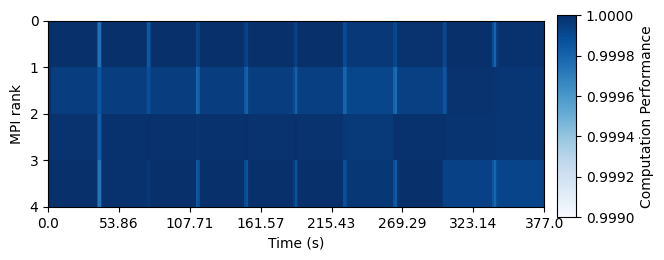

In [9]:
%matplotlib inline
# %matplotlib tk

def plot_rec(data):
    # figsz = {'figure.figsize': (6, 4)}
    # plt.rcParams.update(figsz)
    fig, ax = plt.subplots()
    # data = np.loadtxt(fname='voila-cg.txt')
    data_max = data.max()
    print('len(time)=%d'%len(data[0]))
    im = ax.imshow(data/data_max, interpolation='nearest', cmap='Blues', vmin=0.999, vmax=1, extent=[0,len(data[0]),len(data),0])
#     im = ax.imshow(data/data_max, interpolation='nearest', cmap='Blues', vmin=0.6, vmax=1, extent=[0,len(data[0]),len(data),0])
    ax.set_aspect(3*len(data[0])/nprocs/8)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('MPI rank')
   # val = (len(data[1])-1)*unit
   
    
    cbaxes = fig.add_axes([0.92, 0.28, 0.03, 0.42])
    xtick = [i for i in range(0,r+1,int(1/un))]
    control = 50 #the plot is too small to label all 67 numbers

    numticks = int((r+1)//control)+1
    print(numticks)
    xticks = np.linspace(0,len(data[1]),numticks)
    xlabel = np.linspace(0,r+1,numticks)
    ax.set_xticks(xticks)
    ax.set_xticklabels(np.round(xlabel,2))
    cb = plt.colorbar(im, orientation='vertical', cax=cbaxes)#, ticks=[0.5,0.6,0.7,0.8,0.9,1.0])
    cb.set_label('Computation Performance')
#     plt.show()
    return fig


np_final_perf=np.array(final_perf)

print(np_final_perf.shape)
print(np_final_perf)

# [YC note] - performance was already normalized for each workload snippet, so I commented this out
#np_final_perf=np_final_perf[[2*i for i in range(nprocs//2)]+[2*i+1 for i in range(nprocs//2)],:]
#print("np_final_perf_max: ", np_final_perf.max())
#np_final_perf/=np_final_perf.max()

print(np_final_perf)
# np_final_perf=np_final_perf[:,:50]
first_non_zero=0
for i in range(30):
    if np_final_perf[0,i]>=0:
        first_non_zero=i
        break

# np_final_perf/=np_final_perf.max(axis=1).reshape([nprocs,1])
np_final_perf[np_final_perf<=0]=1
# np_final_perf=np_final_perf[:,first_non_zero:]
print(np_final_perf.mean(axis=1))
fig = plot_rec(np_final_perf)
#fig.savefig('../plots/LU_16.pdf')
# np_final_perf=np_final_perf.reshape((np_final_perf.shape[0],-1,2)).mean(axis=2)
# plot_rec(np_final_perf)